# **CCC-BIDMC Schedule Generator**

**Semester:** Summer 2024

**Ayush Noori** <br>
**Crimson Care Collaborative Clinic** <br>
**May 19, 2024**

---

In [9]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path management
from pathlib import Path

# Get downloads folder
# data_dir = Path.home() / "Downloads"
data_dir = Path.cwd() / "data" / "summer_2024"
output_dir = Path.cwd() / "output" / "summer_2024"

Read in clinic roster.

In [36]:
# Read in roster
roster = pd.read_csv(output_dir / "summer_2024_roster.csv")

# Remove duplicates based on First/Last
roster = roster.drop_duplicates(subset=["First", "Last"])

# Replace names
roster.loc[roster["Role"] == "Observer", "Role"] = "Summer Student"
roster.loc[roster["Role"] == "Clinic Operations Director", "Role"] = "Operations Director"
roster["Role"] = roster["Role"].str.replace(" ", "\n")

Create figures showing clinic roster.

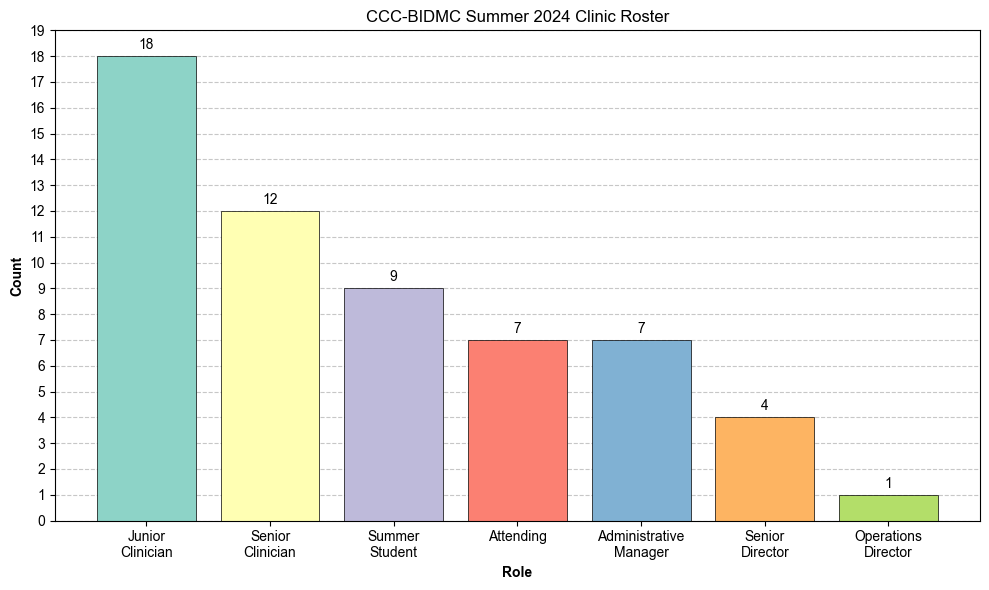

In [40]:
# Generate counts
clinic_roles = roster["Role"].value_counts()
plt.rcParams['font.sans-serif'] = "Arial"

# Generate colormap
cmap = plt.get_cmap('Set3')
# heights = clinic_roles.values
# min_height = min(heights)
# max_height = max(heights)
# norm_heights = (heights - min_height) / (max_height - min_height)
# cmap = plt.get_cmap('viridis')
# colors = cmap(norm_heights)

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(clinic_roles.index, clinic_roles.values,
               edgecolor='black', linewidth=0.5,
               color=cmap(range(len(clinic_roles))), zorder=2)

# Add labels
plt.title("CCC-BIDMC Summer 2024 Clinic Roster")
plt.ylabel("Count", fontweight='bold')
plt.xlabel("Role", fontweight='bold')

# Add y-axis grid
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Make y-axis integers
plt.yticks(np.arange(0, clinic_roles.max() + 2, 2))

# Annotate bars with their counts
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()

# Save plot
plt.savefig(output_dir / "CCC BIDMC Summer 2024 Clinic.png", dpi=300)
plt.savefig(output_dir / "CCC BIDMC Summer 2024 Clinic.pdf")
plt.show()